In [69]:
import numpy as np
import pandas as pd
from scipy import stats
from numpy import random as npr
npr.seed(123) 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

'%.4f'

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

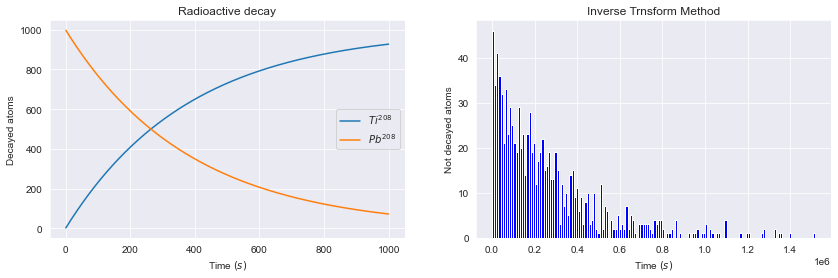

In [57]:
sns.set_style("darkgrid")
T= 3.052 * 60 # sec
N = 1000
tau = T/np.log(2)

def prob(t, tau):
    return 1 - 2**(-t/tau)
time = np.linspace(1, N, N)
Tl = N * prob(time, tau)
Pb = N - Tl

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
ax1.plot(time, Tl, label='$Ti^{208}$')
ax1.plot(time, Pb, label='$Pb^{208}$')
ax1.set_ylabel('Decayed atoms')
ax1.set_xlabel('Time $(s)$')
ax1.legend()
ax1.set_title('Radioactive decay');

def prob_inv(t, tau):
    return -np.log(1 - t) * tau
time_inv= npr.random(1000)
Tl_inv = N * prob_inv(time_inv, tau)
ax2.hist(Tl_inv,bins=150, color='b')
ax2.set_ylabel('Not decayed atoms')
ax2.set_xlabel('Time $(s)$')
ax2.set_title('Inverse Trnsform Method');

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [72]:
Z = 79
e = 1.602176634e-19 
E = 7.7*1000000*e
a0 = 5.291777721092E-11
eps0 = 8.85418781762E-12
sigma = a0/100
N = 1000000

#Beam area
x = np.random.normal(0, sigma, alpha)
y = np.random.normal(0, sigma, alpha)
C= Z * e**2 / (2 * np.pi * eps0 * E)

count = 0
for i in range(N):
    b = np.sqrt(x[i]**2 + y[i]**2)
    if b < C:
        count += 1

print(count, "particles were reflected")
print("The fraction of particles that bounced back were:", (count/N))

1505 particles were reflected
The fraction of particles that bounced back were: 0.001505


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [138]:
import scipy.integrate as integrate

f_true= lambda x:(np.sin(1/(x*(2-x))))**2
I, true_err = integrate.quad(f_true, 0, 1)


def f(x):
    return (np.sin(1/(x*(2-x))))**2

N=100000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y < f(x):
        count+=1
        
hm_integral=2*count/N
hm_err = abs(I-hm_integral)/I
#mean value

mvm_x = 2*np.random.random(N)
mvm_integral= (2/N)*np.sum(f(mvm_x))
mvm_err = abs(I-mvm_integral)/I

print(f"The Actual value is:{round(I, 4)} with error {round(true_err, 4)}")
print(f"The Hit/miss method is: {round(hm_integral, 4)} with error {round(hm_err, 4)}")
print(f"The mean value method:{round(mvm_integral, 4)} with error {round(mvm_err, 4)}")


<ipython-input-138-66be3d2686b3>:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I, true_err = integrate.quad(f_true, 0, 1)


The Actual value is:0.7258 with error 0.0007
The Hit/miss method is: 1.4547 with error 1.0044
The mean value method:1.452 with error 1.0007


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



0.3926990816987216


In [176]:
def func(x,y):
    return (np.sqrt(x**2 + y**2))
N=100000
count=0
for i in range( N):
    x=npr.random()
    y=npr.random()
    if func(x,y) <1.0:
        count+=1
        
I_2D= 4*(float(count)/N)

print("The area of circle:", I_2D)



The area of circle: 3.13804


In [180]:
def func_2(x):
    y = np.linalg.norm(x)
    if y < 1:
        return 1
    else:
        return 0

count2 = 0
d = 10
for i in range(N):
    x=npr.random(d)
    count2+=func_2(x)

I_10D = 2**d*(count2)/N
print("The area of 10D sphere:", I_10D)


The area of 10D sphere: 2.69312


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [193]:
def f(x):
    return 1/( np.sqrt(x) * (np.exp(x)+1))

w= lambda x: 1/np.sqrt(x)
N = 100000
x=npr.uniform(0,1, N)
w_int=2
y= np.sum (f(x)/w(x))
I = y*w_int/N
print(I)

0.7605324251177529
